In [525]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker


In [526]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [527]:
'''
With all these features, we can build our North Star Metric equation:
Revenue = Active Customer Count * Order Count * Average Revenue per Order
It's time to get our hands dirty. We want to see monthly revenue but unfortunately 
there is no free lunch. Let's engineer our data:
'''
#converting the type of Invoice Date Field from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#print(data.dtypes['InvoiceDate'])

In [528]:
#creating YearMonth field for the ease of reporting and visualization

data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100* date.year + date.month)

data['InvoiceYearMonth']

0         201012
1         201012
2         201012
3         201012
4         201012
           ...  
541904    201112
541905    201112
541906    201112
541907    201112
541908    201112
Name: InvoiceYearMonth, Length: 541909, dtype: int64

In [529]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
data['Revenue'] = data['UnitPrice'] * data['Quantity']

data['Revenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 541909, dtype: float64

In [530]:
# get Revenue per month
Revenue_perMonth = data.groupby(data['InvoiceYearMonth'])['Revenue'].sum().reset_index()
Revenue_perMonth

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


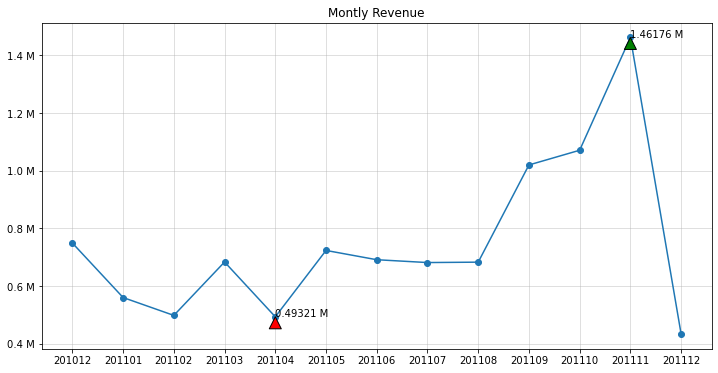

In [531]:
# set distance between ticks
plt.figure(figsize= (12,6) )

# change Unit of measurement y ticks to M
scale_y = 1e6
Revenue_perMonth['RevenueUnitM'] = Revenue_perMonth['Revenue'].map(lambda ticks_y: ticks_y/scale_y)
Revenue_perMonth['RevenueUnitM']
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%1.1f M'))

# plot fig
plt.plot(Revenue_perMonth['InvoiceYearMonth'].to_numpy(dtype = 'str') , Revenue_perMonth['RevenueUnitM'], marker='o')
plt.title('Montly Revenue')
plt.grid(alpha = 0.5)

# show Max Revenue point

ymax = Revenue_perMonth['RevenueUnitM'].max()
ymaxStr = str(round(ymax,5))
ymaxStr = (ymaxStr+ ' M')

xpos = Revenue_perMonth.loc[Revenue_perMonth['RevenueUnitM']== ymax]['InvoiceYearMonth']
xmax = xpos.to_numpy(dtype= 'str')
 
plt.annotate(ymaxStr, xy=(xmax, ymax), xytext= (xmax, ymax), arrowprops=dict(facecolor='green'),)

# show Min Revenue point

ymin = Revenue_perMonth[Revenue_perMonth['InvoiceYearMonth']<201112]['RevenueUnitM'].min()
yminStr = str(round(ymin,5))
yminStr = (yminStr+ ' M')

xpos = Revenue_perMonth.loc[Revenue_perMonth['RevenueUnitM']== ymin]['InvoiceYearMonth']
xmin = xpos.to_numpy(dtype= 'str')
 
plt.annotate(yminStr, xy=(xmin, ymin), xytext= (xmin, ymin), arrowprops=dict(facecolor='red'),)

plt.show()


In [532]:
'''
This clearly shows our revenue is growing especially Aug' 11 onwards 
(and our data in December is incomplete). Absolute numbers are fine, let's 
figure out what is our Monthly Revenue Growth Rate:
'''
#using pct_change() function to see monthly percentage change
Revenue_perMonth['MonthlyGrowth']= Revenue_perMonth['Revenue'].pct_change()
Revenue_perMonth.head()


,InvoiceYearMonth,Revenue,RevenueUnitM,MonthlyGrowth
0,201012,748957.020,0.748957,NaN
1,201101,560000.260,0.560000,-0.252293
2,201102,498062.650,0.498063,-0.110603
3,201103,683267.080,0.683267,0.371850
4,201104,493207.121,0.493207,-0.278163


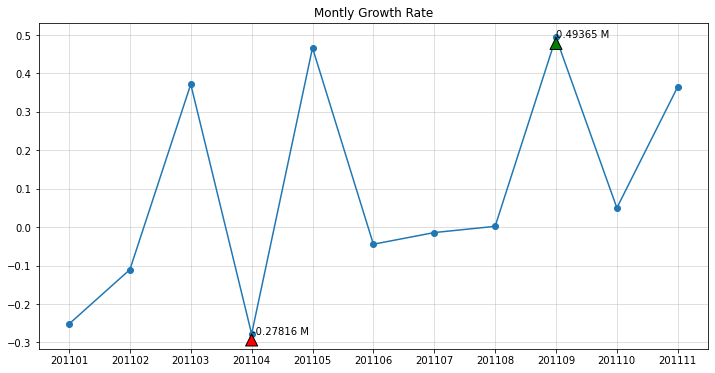

In [533]:
# set distance between ticks
plt.figure(figsize= (12,6) )

# plot fig
plt.plot(Revenue_perMonth['InvoiceYearMonth'].to_numpy(dtype = 'str')[:-1] , Revenue_perMonth['MonthlyGrowth'][:-1], marker='o')
plt.title('Montly Growth Rate')
plt.grid(alpha = 0.5)

# show Max Revenue point

ymax = Revenue_perMonth['MonthlyGrowth'][:-1].max()
ymaxStr = str(round(ymax,5))
ymaxStr = (ymaxStr+ ' M')

xpos = Revenue_perMonth.loc[Revenue_perMonth['MonthlyGrowth']== ymax]['InvoiceYearMonth']
xmax = xpos.to_numpy(dtype= 'str')
 
plt.annotate(ymaxStr, xy=(xmax, ymax), xytext= (xmax, ymax), arrowprops=dict(facecolor='green'))

#plt.show()

# show Min Revenue point
ymin = Revenue_perMonth['MonthlyGrowth'][:-1].min()
yminStr = str(round(ymin,5))
yminStr = (yminStr+ ' M')

xpos = Revenue_perMonth.loc[Revenue_perMonth['MonthlyGrowth']== ymin]['InvoiceYearMonth']
xmin = xpos.to_numpy(dtype= 'str')
 
plt.annotate(yminStr, xy=(xmin, ymin), xytext= (xmin, ymin), arrowprops=dict(facecolor='red'))

plt.show()


# Everything looks good, we saw 36.5% growth previous month (December is excluded in the code since it hasn't been completed yet).
# But we need to identify what exactly happened on April. Was it due to less active customers or our customers did less orders?
# Maybe they just started to buy cheaper products? We can't say anything without doing a deep-dive analysis.




In [534]:
'''
Monthly Active Customers
To see the details Monthly Active Customers, 
we will follow the steps we exactly did for Monthly Revenue. 
Starting from this part, we will be focusing on UK data only (which has the most records). 
We can get the monthly active customers by counting unique CustomerIDs. Code snippet and the output are as follows:
'''
#creating a new dataframe with UK customers only
data.head()
data_uk = data[data['Country']=='United Kingdom'].reset_index(drop=True)
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [535]:
#creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
monthly_active.head()

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817


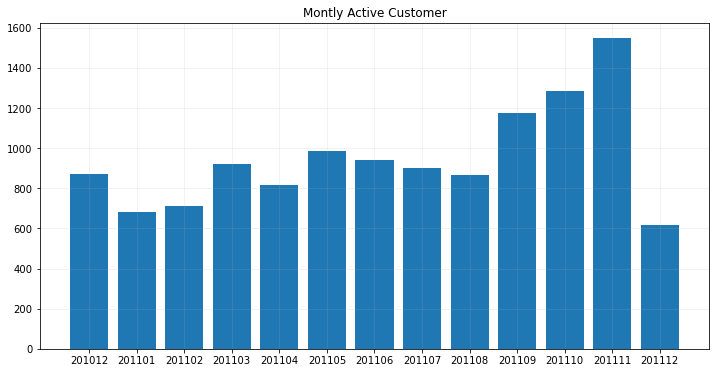

'\nIn April, Monthly Active Customer number dropped to 817 from 923 (-11.5%).\nWe will see the same trend for number of orders as well.\n'

In [536]:
# set distance between ticks
plt.figure(figsize= (12,6) )

# plot Bar
plt.bar(monthly_active['InvoiceYearMonth'].to_numpy(dtype = 'str') , monthly_active['CustomerID'])
plt.title('Montly Active Customer')
plt.grid(alpha = 0.2)

plt.show()
'''
In April, Monthly Active Customer number dropped to 817 from 923 (-11.5%).
We will see the same trend for number of orders as well.
'''

In [537]:
# Monthly Order Count
# We will apply the same code by using Quantity field:
#create a new dataframe for no. of order by using quantity field
data_uk.head()
monthly_sales = data_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
monthly_sales.head()

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666


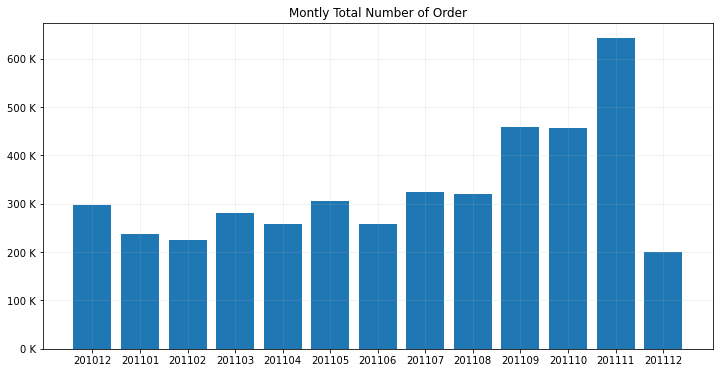

'\nAs we expected, Order Count is also declined in April (279k to 257k, -8%)\nWe know that Active Customer Count directly affected Order Count decrease. \nAt the end, we should definitely check our Average Revenue per Order as well.\n'

In [538]:
plt.figure(figsize= (12,6) )

# change Unit of measurement y ticks to M
scale_y = 1e3
monthly_sales['QuantityUnitK'] = monthly_sales['Quantity'].map(lambda ticks_y: ticks_y/scale_y)
Revenue_perMonth['RevenueUnitM']
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d K'))

# plot Bar
plt.bar(monthly_sales['InvoiceYearMonth'].to_numpy(dtype = 'str') , monthly_sales['QuantityUnitK'])
plt.title('Montly Total Number of Order')
plt.grid(alpha = 0.2)

plt.show()

'''
As we expected, Order Count is also declined in April (279k to 257k, -8%)
We know that Active Customer Count directly affected Order Count decrease. 
At the end, we should definitely check our Average Revenue per Order as well.
'''

In [539]:
# Average Revenue per Order
# To get this data, we need to calculate the average of revenue for each month:
data_uk.head()
monthly_orderAvg = data_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
monthly_orderAvg.head()

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380


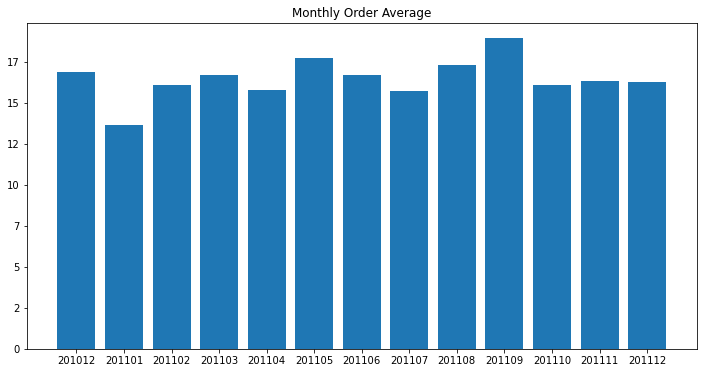

'\nEven the monthly order average dropped for April (16.7 to 15.8). \nWe observed slow-down in every metric affecting our North Star.\n'

In [540]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_orderAvg['InvoiceYearMonth'].to_numpy(dtype= 'str'), monthly_orderAvg['Revenue'])
plt.title('Monthly Order Average')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()
'''
Even the monthly order average dropped for April (16.7 to 15.8). 
We observed slow-down in every metric affecting our North Star.
'''

In [541]:
'''
We have looked at our major metrics. Of course there are many more and it varies across industries. 
Let's continue investigating some other important metrics:
New Customer Ratio: a good indicator of if we are losing our existing customers or unable to attract new ones
Retention Rate: King of the metrics. Indicates how many customers we retain over specific time window.
We will be showing examples for monthly retention rate and cohort based retention rate.
New Customer Ratio
First we should define what is a new customer. 
In our dataset, we can assume a new customer is whoever did his/her first purchase 
in the time window we defined. We will do it monthly for this example.
We will be using .min() function to find our first purchase date for each customer and define new customers based on that. 
The code below will apply this function and show us the revenue breakdown for each group monthly.

'''
data_uk.head()
min_purchase = data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

#change columns Name
min_purchase.columns = ['CustomerID','MinPurchaseDate']

# change type MinPurchaseDate to YearMonth
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
data_uk_new = data_uk
data_uk_new = pd.merge(data_uk_new, min_purchase, on='CustomerID')

data_uk_new.head()

#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month

data_uk_new['UserType'] = 'New'
data_uk_new.loc[data_uk_new['InvoiceYearMonth']> data_uk_new['MinPurchaseYearMonth'],'UserType'] = 'Existing'

data_uk_new.head()

#calculate the Revenue per month for each user type
user_type_revenue = data_uk_new.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
user_type_revenue.head()
#filtering the dates and plot the result
user_type_revenue = user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
user_type_revenue.head()


,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00
5,201103,Existing,296350.03


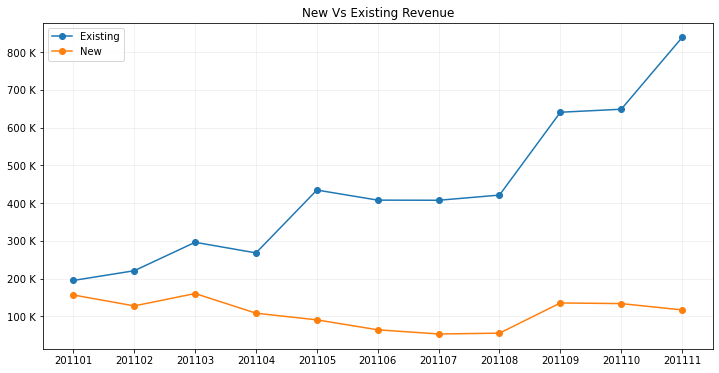

'\nExisting customers are showing a positive trend \nand tell us that our customer base is growing but new customers have a slight negative trend.\n'

In [542]:
plt.figure(figsize=(12,6) )
# change unit Revenue to K
scale_y = 1e3
user_type_revenue['RevenueUnit'] = user_type_revenue['Revenue'].map(lambda ticks_y: ticks_y / scale_y)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d K'))

#plot

x_Exist = user_type_revenue[user_type_revenue['UserType']=='Existing']['InvoiceYearMonth']
y_Exist = user_type_revenue[user_type_revenue['UserType']=='Existing']['RevenueUnit']
plt.plot(x_Exist.to_numpy(dtype = 'str'), y_Exist, marker='o')

x_New = user_type_revenue[user_type_revenue['UserType']=='New']['InvoiceYearMonth']
y_New = user_type_revenue[user_type_revenue['UserType']=='New']['RevenueUnit']
plt.plot(x_New.to_numpy(dtype = 'str'), y_New, marker='o')


plt.legend(labels=['Existing', 'New'])
plt.title('New Vs Existing Revenue')
plt.grid(alpha = 0.2)
plt.show()

'''
Existing customers are showing a positive trend 
and tell us that our customer base is growing but new customers have a slight negative trend.
'''


In [543]:
# Let’s have a better view by looking at the New Customer Ratio:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
# newUser / Existing User
uk_user_ratio = data_uk_new.query("UserType =='New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / data_uk_new.query("UserType=='Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
uk_user_ratio = uk_user_ratio.reset_index()
# dropna() function return Index without NA/NaN values

uk_user_ratio = uk_user_ratio.dropna()
uk_user_ratio


,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


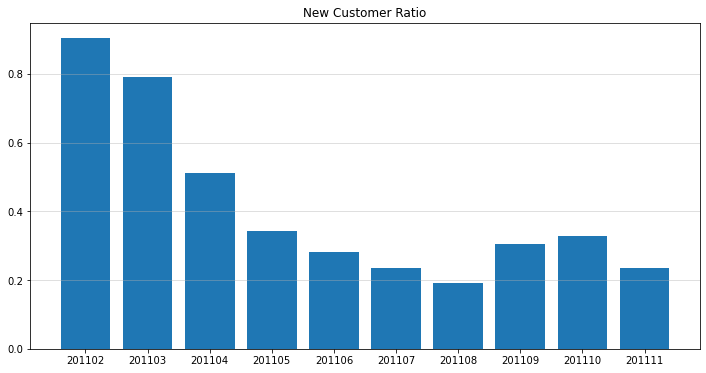

'\nNew Customer Ratio has declined as expected (we assumed on Feb, all customers were New) and running around 20%.\n'

In [544]:
#plot

plt.figure(figsize=(12,6))

x_r = uk_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype = 'str')
y_r = uk_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID']
uk_user_ratio['CustomerID']

plt.bar(x_r, y_r)
plt.title('New Customer Ratio')
plt.grid(axis= 'y' ,alpha = 0.5)
plt.show()
'''
New Customer Ratio has declined as expected (we assumed on Feb, all customers were New) and running around 20%.
'''

In [545]:
'''
Monthly Retention Rate
Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. 
For making Monthly Retention Rate visualized, 
we need to calculate how many customers retained from previous month.
Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total
We will be using crosstab() function of pandas which makes calculating Retention Rate super easy.
'''
# identify which users are active by looking at their revenue per month
Active_users = data_uk_new.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()
Active_users.head()

# First, we create a dataframe that shows total monthly revenue for each customer:

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771


In [546]:
# create retention matrix with crosstab
retention_user = pd.crosstab(Active_users['CustomerID'], Active_users['InvoiceYearMonth']).reset_index()
retention_user.head()

# crosstab() function converts it to retention table:
'''
Retention table shows us which customers are active on each month (1 stands for active).
With the help of a simple for loop, for each month we calculate Retained 
Customer Count from previous month and Total Customer Count.
In the end, we have our Retention Rate dataframe & line chart like below:
'''

'\nRetention table shows us which customers are active on each month (1 stands for active).\nWith the help of a simple for loop, for each month we calculate Retained \nCustomer Count from previous month and Total Customer Count.\nIn the end, we have our Retention Rate dataframe & line chart like below:\n'

In [547]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = retention_user.columns[2:]
months
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retention_user[selected_month].sum()
    retention_data['RetainedUserCount'] = retention_user[(retention_user[selected_month]>0) & (retention_user[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
retention = pd.DataFrame(retention_array)
retention['retention_Rate'] = retention['RetainedUserCount'] / retention['TotalUserCount']
retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,retention_Rate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


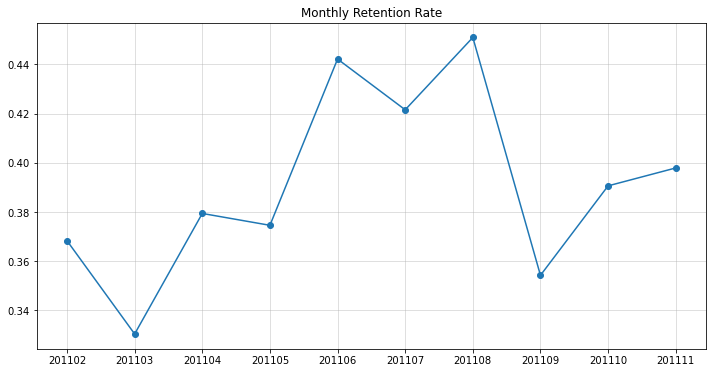

'\nMonthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards.\n'

In [548]:
plt.figure(figsize=(12, 6))
plt.plot(retention['InvoiceYearMonth'][:-1].to_numpy(dtype='str'), retention['retention_Rate'][:-1], marker='o')
plt.title('Monthly Retention Rate')
plt.grid(alpha= 0.5)
plt.show()

'''
Monthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards.
'''

In [549]:
'''
Cohort Based Retention Rate
There is another way of measuring Retention Rate which allows you to see Retention Rate
for each cohort. Cohorts are determined as first purchase year-month of the customers. 
We will be measuring what percentage of the customers retained after their first purchase in each month. 
This view will help us to see how recent and old cohorts differ regarding retention rate 
and if recent changes in customer experience affected new customer's retention or not.
This will be a bit more complicated than others in terms of coding.
'''
Active_users.head()
retention_cohort = pd.crosstab(Active_users['CustomerID'], Active_users['InvoiceYearMonth']).reset_index()
retention_cohort = pd.merge(retention_cohort,min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
retention_cohort.head()


,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101


In [550]:
new_column_names = [ 'm_' + str(column) for column in retention_cohort.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
retention_cohort.columns = new_column_names
retention_cohort.head()


,m_CustomerID,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101


In [551]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan

    total_user_count = retention_cohort[retention_cohort.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 

    query = "MinPurchaseYearMonth == {}".format(selected_month)

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(retention_cohort.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
retention_cohort_new = pd.DataFrame(retention_array)
retention_cohort_new.index = months
retention_cohort_new
'''
We can see that first month retention rate became better recently 
(don't take Dec '
11 into account) and in almost 1 year, 15% of our customers retain with us.
'''

"\nWe can see that first month retention rate became better recently \n(don't take Dec '\n11 into account) and in almost 1 year, 15% of our customers retain with us.\n"

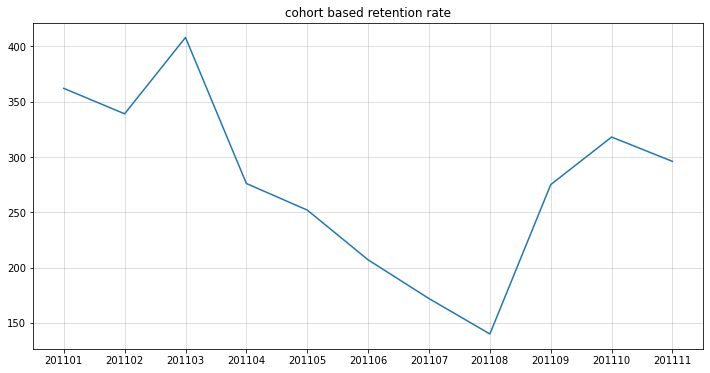

In [552]:
retention_cohort_new.columns
y_list = retention_cohort_new.columns[1:-1]
y_list

plt.figure(figsize=(12, 6))
plt.plot(y_list.to_numpy(dtype='str'), retention_cohort_new['TotalUserCount'][:-1])
plt.title('cohort based retention rate')
plt.grid(alpha = 0.5)
plt.show()